In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
# from tensorflow.keras.layers import Adam
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

Generate Data


In [3]:
X_train = np.linspace(-1, 1, 20)

In [12]:
y_train = np.array([-0.6561,-0.3099,-0.5684,-0.69254,-0.62452,
                    -0.26741,-0.5415,0.15545,0.6541,-0.36411,
                    -0.35411,0.244122,0.23,-0.5111,0.5121111
                    -0.54445,0.25411,0.28411,-0.2445,0.225445,0.232])
y_train.shape

(20,)

In [13]:
X_test = np.linspace(-1,1,20)

In [17]:
y_test = np.array([
    -0.62361,-0.3099,-0.4484,-0.23254,-0.2452,
    -0.2241,-0.5415,0.1525,0.1541,-0.23411,
    -0.35411,0.244122,0.23,-0.5111,0.512121
    -0.5225,0.25412,0.2341,-0.2445,0.222,0.4555
])
y_test.shape

(20,)

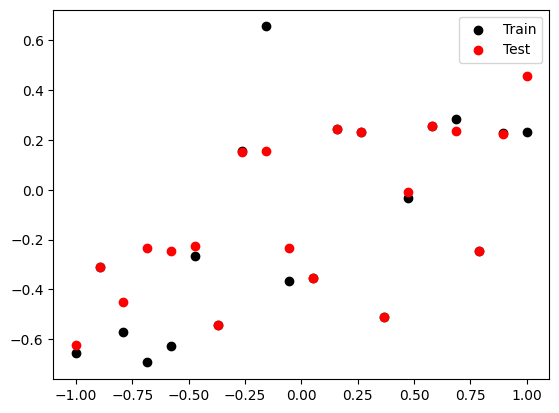

In [18]:
plt.scatter(X_train, y_train, c = 'black', label = 'Train')
plt.scatter(X_test, y_test, c = 'red', label = 'Test')
plt.legend()
plt.show()

Regression Model

In [19]:
model = Sequential()
model.add(Dense(128, input_dim = 1, activation = "relu"))
model.add(Dense(128, activation = "relu"))
model.add(Dense(1, activation = "linear"))

adam = Adam(learning_rate = 0.01)
model.compile(loss = 'mse', optimizer = adam, metrics = ['mse'])
history = model.fit(X_train, y_train, epochs = 500, validation_data = (X_test, y_test), verbose = False)

Evaluate the Model

In [20]:
_, train_mse = model.evaluate(X_train, y_train, verbose = 0)
_, test_mse = model.evaluate(X_test, y_test, verbose = 0)
print('Train: {}, Test: {}'.format(train_mse, test_mse))

Train: 0.009846124798059464, Test: 0.03326835483312607


In [21]:
y_pred = model.predict(X_test)

1/1 [==============================] - 0s 143ms/step


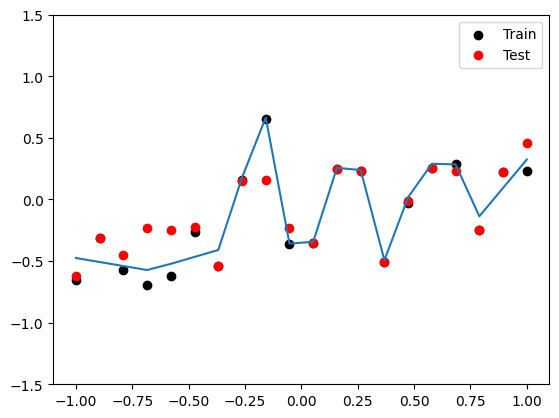

In [22]:
plt.figure()
plt.scatter(X_train, y_train, c = 'black', label = 'Train')
plt.scatter(X_test, y_test, c = 'red', label = 'Test')
plt.plot(X_test, y_pred)
plt.legend()
plt.ylim((-1.5, 1.5))
plt.show()

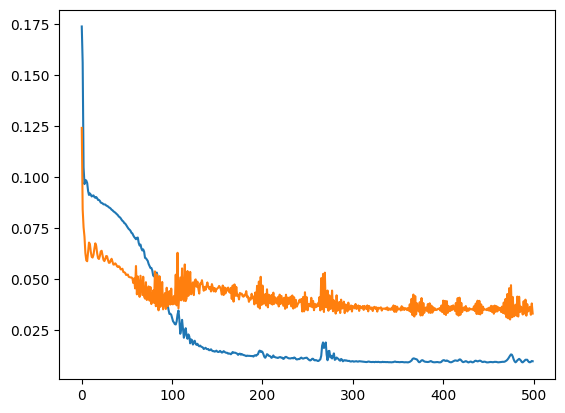

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

Dropout model

In [37]:
model1 = Sequential()

model1.add(Dense(128, input_dim = 1, activation = 'relu'))
model1.add(Dropout(0.5))

model1.add(Dense(128, activation = 'relu'))
model1.add(Dropout(0.5))

model1.add(Dense(1, activation = 'relu'))

adam = Adam(learning_rate = 0.01)
model1.compile(loss = 'mse', optimizer = adam, metrics = ['mse'])

history = model1.fit(X_train, y_train, epochs = 500, validation_data = (X_test, y_test), verbose = False)

In [38]:
_, train_mse = model1.evaluate(X_train, y_train, verbose = 0)
_, test_mse = model1.evaluate(X_test, y_test, verbose = 0)
print('Train : {}, Test : {}'.format(train_mse,test_mse))

Train : 0.17392084002494812, Test : 0.10902931541204453


In [39]:
y_pred_1 = model1.predict(X_test)

1/1 [==============================] - 0s 67ms/step


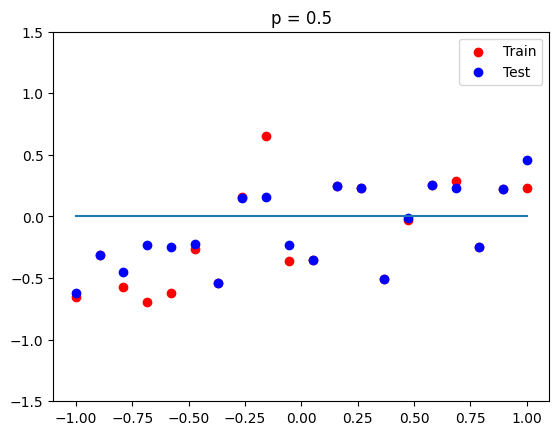

In [40]:
plt.figure()
plt.title('p = 0.5')
plt.scatter(X_train, y_train, c = 'red', label = 'Train')
plt.scatter(X_test, y_test, c = 'blue', label = 'Test')
plt.plot(X_test, y_pred_1)
plt.legend()
plt.ylim((-1.5,1.5))
plt.show()

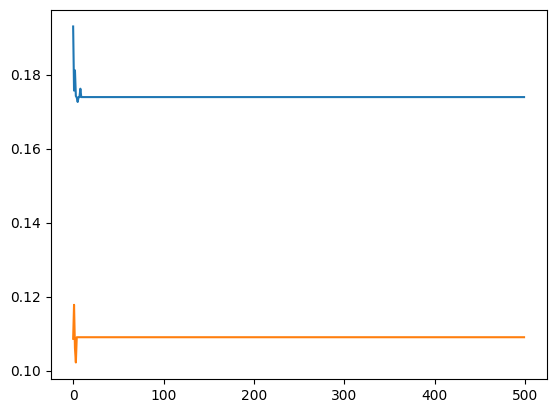

In [41]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])